<a href="https://colab.research.google.com/github/mirocon/Project_Python_R/blob/master/R_python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Load data


In [6]:
data= pd.read_csv("https://raw.githubusercontent.com/mirocon/Project_Python_R/master/covid.csv",sep=";")

data["cases_per_million_inhabitants"]= (data["cases"]/data["population"])*1000000

data["deaths_per_million_inhabitants"]=(data["deaths"]/data["population"])*1000000

data["date"]= pd.to_datetime(data["date"], dayfirst=True)

data["date"] = data["date"].sort_values() 

pd.options.display.max_columns = None
display(data)

,date,day,month,year,cases,deaths,country,code,population,continent,cases_cum,deaths_cum,cases_per_million_inhabitants,deaths_per_million_inhabitants
0,2019-12-31,31,12,2019,0,0,Afghanistan,AF,38041757.0,Asia,0,0,0.000000,0.00000
1,2020-01-01,1,1,2020,0,0,Afghanistan,AF,38041757.0,Asia,0,0,0.000000,0.00000
2,2020-01-02,2,1,2020,0,0,Afghanistan,AF,38041757.0,Asia,0,0,0.000000,0.00000
3,2020-01-03,3,1,2020,0,0,Afghanistan,AF,38041757.0,Asia,0,0,0.000000,0.00000
4,2020-01-04,4,1,2020,0,0,Afghanistan,AF,38041757.0,Asia,0,0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-12-10,10,12,2020,95,1,Zimbabwe,ZW,14645473.0,Africa,11007,304,6.486646,0.06828
61896,2020-12-11,11,12,2020,74,1,Zimbabwe,ZW,14645473.0,Africa,11081,305,5.052756,0.06828
61897,2020-12-12,12,12,2020,81,1,Zimbabwe,ZW,14645473.0,Africa,11162,306,5.530719,0.06828
61898,2020-12-13,13,12,2020,57,1,Zimbabwe,ZW,14645473.0,Africa,11219,307,3.891988,0.06828


We created two new columns to calculate the incidence per million of people both for the number of deaths and for the number of cases

**Setting up our dataframe for data visualization**

In [7]:

grouper = data.groupby('country') #country row has repeted entry because correspond to dates so we group by country


In [8]:
### create dataframe only for cases.

df_covid_cases = pd.concat([pd.Series(v['cases'].tolist(), name=k) for k, v in grouper], axis=1).set_index(data["date"][1:351])
df_covid_cases.fillna(0, inplace=True) #here I fill the null values as 0 (some low income countries have NaN values in certain dates)
df_covid_cases.index = pd.to_datetime(df_covid_cases.index, dayfirst=True)
df_covid_cases.index = df_covid_cases.index.sort_values()

pd.options.display.max_columns = None
display(df_covid_cases)

### create death dataframe
df_covid_death = pd.concat([pd.Series(v['deaths'].tolist(), name=k) for k, v in grouper], axis=1).set_index(data["date"][1:351])
df_covid_death.fillna(0, inplace=True) #here I fill the null values as 0 (some low income countries have NaN values in certain dates)
df_covid_death.index = pd.to_datetime(df_covid_death.index, dayfirst=True)
df_covid_death.index = df_covid_death.index.sort_values()

### million inhabitants datframe

df_covid_million = pd.concat([pd.Series(v['cases_per_million_inhabitants'].tolist(), name=k) for k, v in grouper], axis=1).set_index(data["date"][1:351])
df_covid_million.fillna(0, inplace=True) #here I fill the null values as 0 (some low income countries have NaN values in certain dates)
df_covid_million.index = pd.to_datetime(df_covid_million.index, dayfirst=True)
df_covid_million.index = df_covid_million.index.sort_values()

### create dataframe cumulative cases
df_cases_cum = pd.concat([pd.Series(v['cases_cum'].tolist(), name=k) for k, v in grouper], axis=1).set_index(data["date"][1:351])
df_cases_cum.fillna(0, inplace=True) #here I fill the null values as 0 (some low income countries have NaN values in certain dates)
df_cases_cum.index = pd.to_datetime(df_cases_cum.index, dayfirst=True)
df_cases_cum.index = df_cases_cum.index.sort_values()


,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,"Bonaire, Saint Eustatius and Saba",Bosnia_and_Herzegovina,Botswana,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Burundi,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,Central_African_Republic,Chad,Chile,China,Colombia,Comoros,Congo,Costa_Rica,Cote_dIvoire,Croatia,Cuba,Curaçao,Cyprus,Czechia,Democratic_Republic_of_the_Congo,Denmark,Djibouti,Dominica,Dominican_Republic,Ecuador,Egypt,El_Salvador,Equatorial_Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Falkland_Islands_(Malvinas),Faroe_Islands,Fiji,Finland,France,French_Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guam,Guatemala,Guernsey,Guinea,Guinea_Bissau,Guyana,Haiti,Holy_See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle_of_Man,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall_Islands,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New_Caledonia,New_Zealand,Nicaragua,Niger,Nigeria,North_Macedonia,Northern_Mariana_Islands,Norway,Oman,Pakistan,Palestine,Panama,Papua_New_Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto_Rico,Qatar,Romania,Russia,Rwanda,Saint_Kitts_and_Nevis,Saint_Lucia,Saint_Vincent_and_the_Grenadines,San_Marino,Sao_Tome_and_Principe,Saudi_Arabia,Senegal,Serbia,Seychelles,Sierra_Leone,Singapore,Sint_Maarten,Slovakia,Slovenia,Solomon_Islands,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis_and_Futuna,Western_Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,2.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,0,0,0.0,1.0,0.0,3.0,1.0,0.0,0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,0,2.0,1.0,2.0,2.0,2.0,0.0,1.0,0,2.0,0.0,1.0,1.0,1.0,1.0,27,1.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,2.0,0,1.0,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0,3.0,1.0,1.0,0.0,0,2.0,10.0,0.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,0,0.0,0.0,0,0.0,0.0,1.0,0.0,0,2.0,0,5.0,1.0,6.0,1.0,2.0,0.0,3.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,0.0,2.0,2.0,1.0,1.0,1.0,3.0,0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,0,2.0,0.0,1.0,1.0,0.0,0.0,2.0,0,0.0,0.0,7.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,64.0,0.0,0.0,0,1.0,2.0,2.0,1.0,0.0,4.0,1.0,1.0,1.0,2.0,1.0,0,1.0,1.0,1.0,2.0,1.0,1.0,0,1.0,0.0,0.0,1.0,1.0,0,0,1.0,0,15.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0,1.0,17.0,0,6.0,6.0,1.0,10.0,0.0,1.0,6.0,1.0,2.0,1.0
2020-01-02,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0.0,10.0,2.0,0.0,0.0,0.0,1.0,0,1.0,0.0,2.0,0.0,0.0,2.0,0,2.0,0.0,0.0,4.0,3.0,0.0,1.0,2.0,4.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0,0.0,0.0,0,0.0,0.0,1.0,0.0,0,4.0,0,7.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,9.0,0,2.0,0.0,0.0,6.0,0.0,1.0,0.0,2.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0,0.0,0.0,9.0,6.0,0.0,4.0,6.0,0.0,4.0,2.0,36.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,1.0,0.0,0,1.0,2.0,5.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0

Here we used Pandas with the Pandas Series method that create a one-dimensional labeled array capable of holding data of any type, here we put the various indicators we needed (deaths, cases, cumulative_cases) to a list, and then we associated to the grouper we used before that contain the countries name.
We put date as index, so at the end we will have as many columns as countries and as index the date, so they are all on the same level. 
Since the API collected until the 14th December we sliced the index from 1 to 351 since is of length of 350 days

##**DATA VISUALIZATION**

In [9]:
### plot data cases
def plot_data_cases(df, title="COVID-19 Cases"):
    df.plot(title=title, fontsize=7)
    plt.xlabel("Dates")
    plt.ylabel("Cases")
    plt.xticks( rotation=45)
    plt.tick_params(axis='y', labelsize=7)
    plt.tight_layout()
    plt.show()

### plot data deaths
def plot_data_death(df, title="COVID-19 Death"):
    df.plot(title=title, fontsize=7)
    plt.xlabel("Dates")
    plt.ylabel("Deaths")
    plt.xticks( rotation=45)
    plt.tick_params(axis='y', labelsize=7)
    plt.tight_layout()
    plt.show()
###plot cases per million inhabitants
def plot_data_million(df, title="COVID-19 Cases per Million Inhabitants"):
    df.plot(title=title, fontsize=7)
    plt.xlabel("Dates")
    plt.ylabel("Cases per 1M")
    plt.xticks( rotation=45)
    plt.tick_params(axis='y', labelsize=7)
    plt.tight_layout()
    plt.show()

### plot cumulative cases
def plot_cases_cum(df, title="Cumulative COVID-19 Cases"):
    df.plot(title=title, fontsize=7)
    plt.xlabel("Dates")
    plt.ylabel("Cumulative Cases")
    plt.xticks( rotation=45)
    plt.tick_params(axis='y', labelsize=7)
    plt.tight_layout()
    plt.show()


We created several functions for several plots

In [10]:
countries=["Italy", "France", "Germany", "United_Kingdom"]

For simplicity we selected a subset of countries 

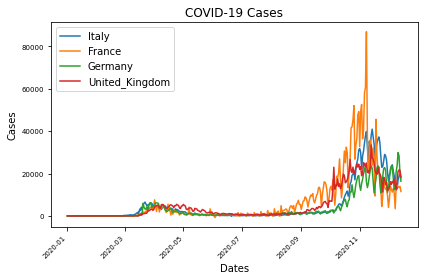

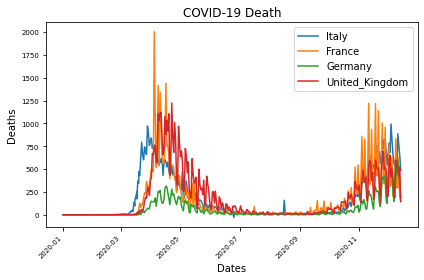

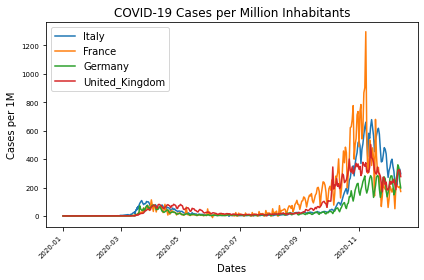

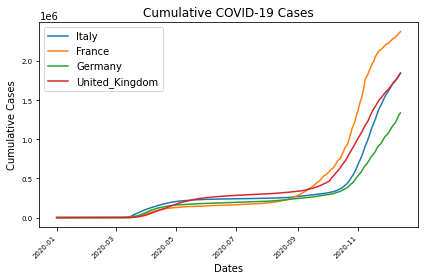

In [11]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
plot_data_cases(df_covid_cases[countries]) 
plot_data_death(df_covid_death[countries])
plot_data_million(df_covid_million[countries])
plot_cases_cum(df_cases_cum[countries])

 # **BAR PLOT VISUALIZATION**

                sum continent
continent                    
Africa      2379827    Africa
America    30887593   America
Asia       16782046      Asia
Europe     21400012    Europe
Oceania       53440   Oceania
Other           696     Other


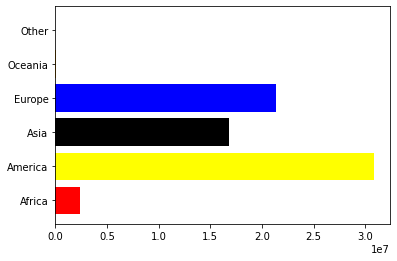

In [12]:

df2 = data.groupby('continent')['cases'].agg(['sum'])
a=df2.index.tolist()
df2["continent"]=a
print(df2)
c = ['red', 'yellow', 'black', 'blue', 'orange']

plt.barh(df2["continent"], df2["sum"], color=c)


plt.show()

#DYNAMIC DATA VISUALIZATION OF COVID-19 CASES AND DEATHS

In [13]:
pip install jupyter-dash -q

     |████████████████████████████████| 7.3 MB 14.4 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 357 kB 69.8 MB/s 


In [14]:
from jupyter_dash import JupyterDash

We created a dashboard which shows both cases and deaths during 2020 and the user can choose which countries it desires typing the name in the search bar or selecting by a list. In case the app shouldn't run, try select another port 

In [16]:

import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Output, Input
import pandas as pd  # pip install pandas
import plotly.express as px
import math
from dash import no_update

all_countries = data.country.unique()
app = JupyterDash(__name__)
app.layout = html.Div([

    html.Div([
        dcc.Dropdown(
        id='Countries',
        options=[{'label': k, 'value': k} for k in all_countries],
        multi=True,
        searchable=True
    ), html.H1(children='Covid Cases',
               style={'textAlign': 'center',
            'color': "#180FB0",
                      "font-family":"Helvetica"}),
        dcc.Graph(id="graph")]),

    html.Div([
        html.H1(children='Covid Deaths', style={'textAlign': 'center',
            'color': "#180FB0",
                      "font-family":"Helvetica"}),
        dcc.Graph(
            id='graph2'
        ),
    ]),
])

@app.callback(
    Output("graph", "figure"),
    [Input("Countries", "value")])

def update_line_chart(countries):
    mask = data.country.isin(countries)
    fig = px.line(data[mask],x="date", y="cases", color="country",width=2000, height=1000)
    fig.update()
    return fig

@app.callback(Output('graph2', 'figure'),
              Input("Countries", "value"))

def update_line_chart2(countri):
    mask = data.country.isin(countri)
    fig2 = px.line(data[mask],
        x="date", y="deaths", color='country',width=1500, height=600)
    return fig2

if __name__ == '__main__':
    app.run_server(debug=True, port=8053, mode="inline") # 8053 port or whatever you choose

<IPython.core.display.Javascript object>